# Виконати наступне:
1. Завантажити дані, вивести назви колонок і розмір датасета
2. Опрацювати пропуски (по можливості заповнити їх або видалити)
3. Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції ознак між собою і з цільовою змінною (розміткою); побудувати гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)
4. Нормалізувати дані
5. Провести навчання наступних класифікаторів:
    1. kNN
    1. дерево прийняття рішень
    1. SVM
    1. Random Forest
    1. AdaBoost
---

## Підібрати оптимальні параметри
- для kNN
- для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

> Серед обраних оптимальних моделей кожного класу вибрати найкращу.

Відобразити `sklearn.metrics.classification_report` і `sklearn.metrics.confusion_matrix`

## Pr_1

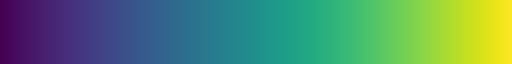

In [1]:
# data processing libs
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.color_palette("viridis", as_cmap=True)

In [2]:
# mount our drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [4]:
#Result Save
df_res = pd.DataFrame({"kNN":[],
                       "kNN_optimal":[],
                    "DTC":[],
                    "SVC":[],
                    "RFC":[],
                    "AB_D":[],
                    "AB_DTC":[],
                    "AB_SVC":[],
                    "AB_RFC":[],
                    "Best":[]
                    })
df_res

,kNN,kNN_optimal,DTC,SVC,RFC,AB_D,AB_DTC,AB_SVC,AB_RFC,Best


In [5]:
# load data from drive
df = pd.read_csv("/content/drive/MyDrive/DA-23/Pr_1/Mine_Dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


In [7]:
df.describe()

,V,H,S,M
count,338.000000,338.000000,338.000000,338.000000
mean,0.430634,0.508876,0.503550,2.952663
std,0.195819,0.306043,0.344244,1.419703
min,0.197734,0.000000,0.000000,1.000000
25%,0.309737,0.272727,0.200000,2.000000
50%,0.359516,0.545455,0.600000,3.000000
75%,0.482628,0.727273,0.800000,4.000000
max,0.999999,1.000000,1.000000,5.000000


### Data Visualisation

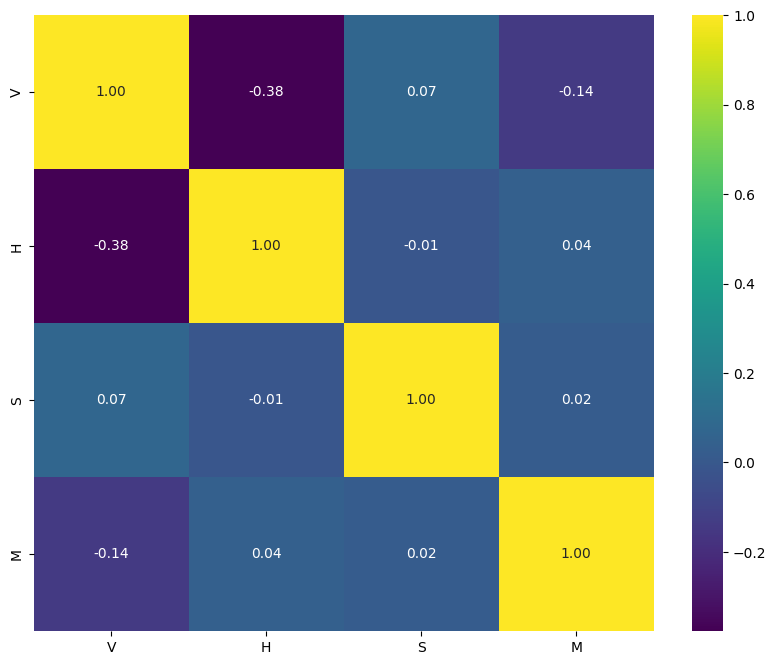

In [8]:
corr =df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,  cmap='viridis', annot=True, fmt=".2f")
plt.show()

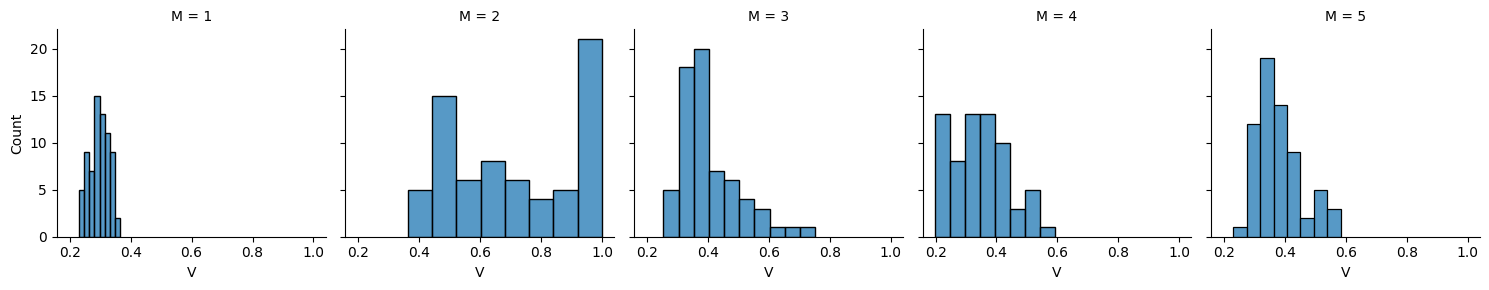

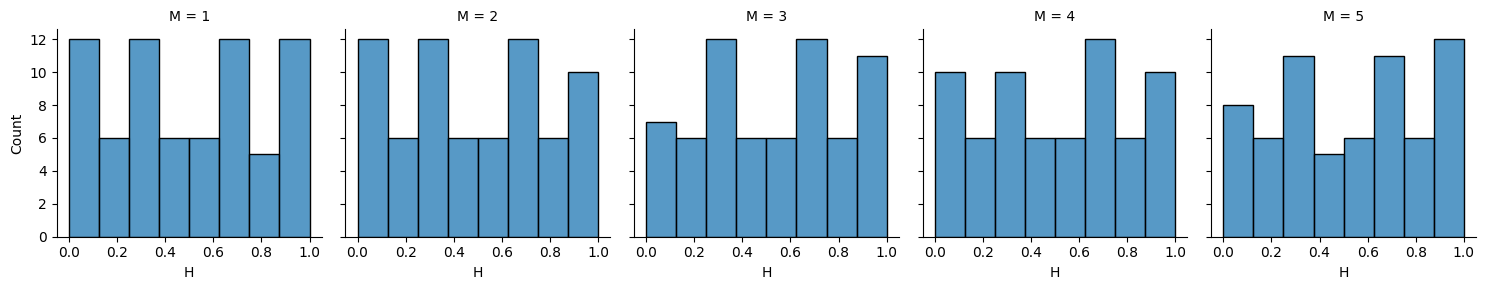

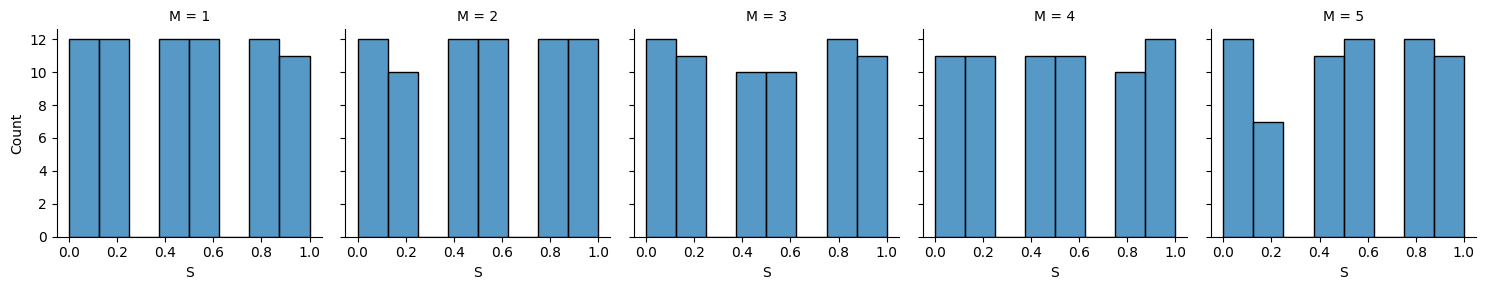

In [9]:
columns = [x for x in df.columns if x not in ["M"]]
for i in range(len(columns)):
    try:
      g = sns.FacetGrid(df, col="M")
      g.map(sns.histplot, columns[i])
    except TypeError as te:
      None

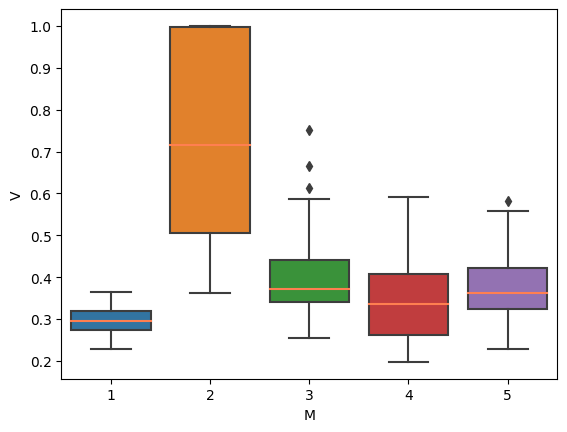

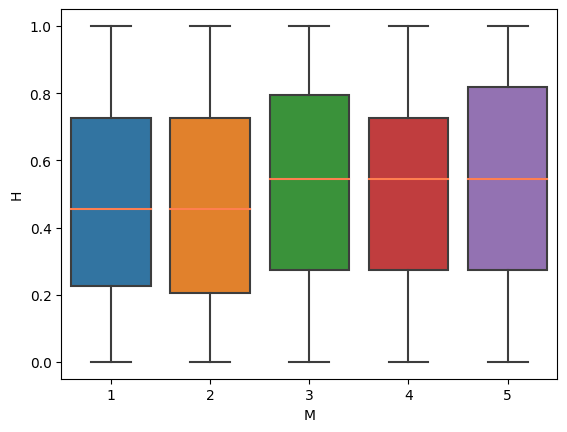

In [10]:
feature_names = [x for x in df.columns if x not in ['M','S']]
for i in range(len(feature_names)):
    figure = plt.figure()
    ax = sns.boxplot(x='M', y=feature_names[i], data=df, medianprops={"color": "coral"})





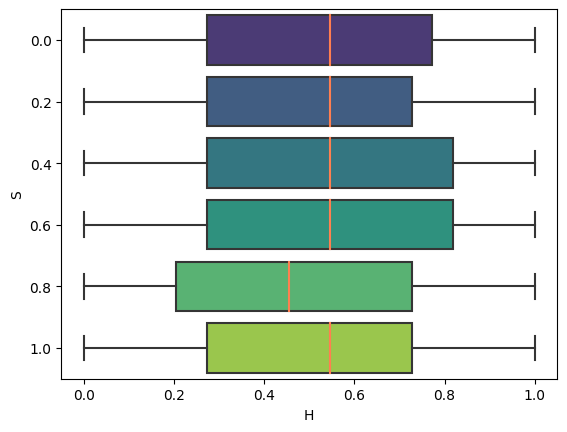

In [11]:
ax2 = sns.boxplot(x='H', y='S', orient="h", flierprops={"marker": "x"},
    medianprops={"color": "coral"}, palette = 'viridis', data = df)


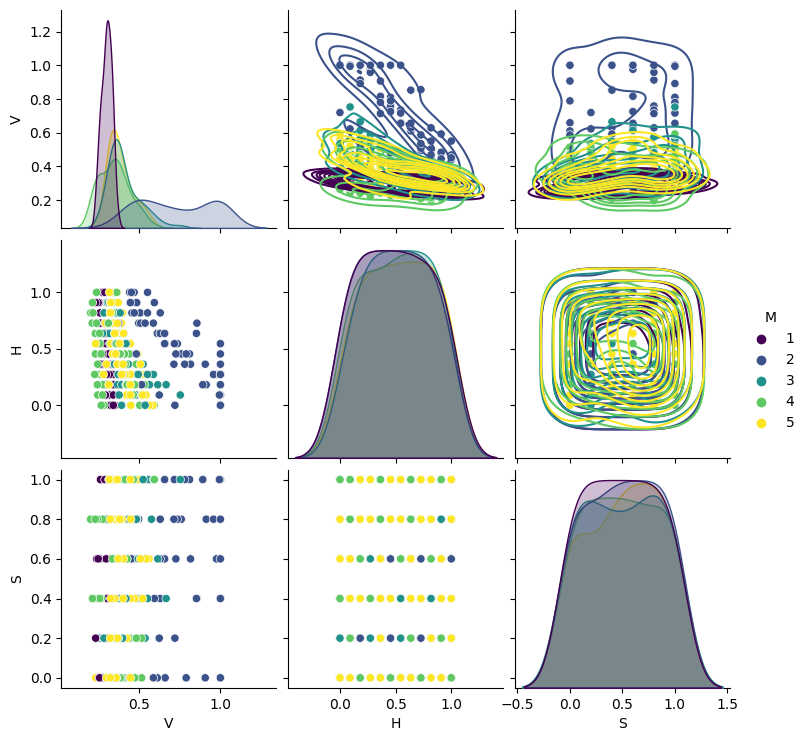

In [12]:
g =sns.pairplot(df, hue="M", palette = 'viridis',)
g.map_upper(sns.kdeplot)

## Pr_2

In [13]:
# load data from drive
#df = pd.read_csv("/content/drive/MyDrive/DA-23/Pr_1/Mine_Dataset.csv")

In [14]:
sample_dict = {"kNN":0,
               "kNN_optimal":0,
                    "DTC":0,
                    "SVC":0,
                    "RFC":0,
                    "AB_D":0,
                    "AB_DTC":0,
                    "AB_SVC":0,
                    "AB_RFC":0,
                    "Best":""}
sample_dict

{'kNN': 0,
 'kNN_optimal': 0,
 'DTC': 0,
 'SVC': 0,
 'RFC': 0,
 'AB_D': 0,
 'AB_DTC': 0,
 'AB_SVC': 0,
 'AB_RFC': 0,
 'Best': ''}

### Train Test Split

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       338 non-null    float64
 1   H       338 non-null    float64
 2   S       338 non-null    float64
 3   M       338 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 10.7 KB


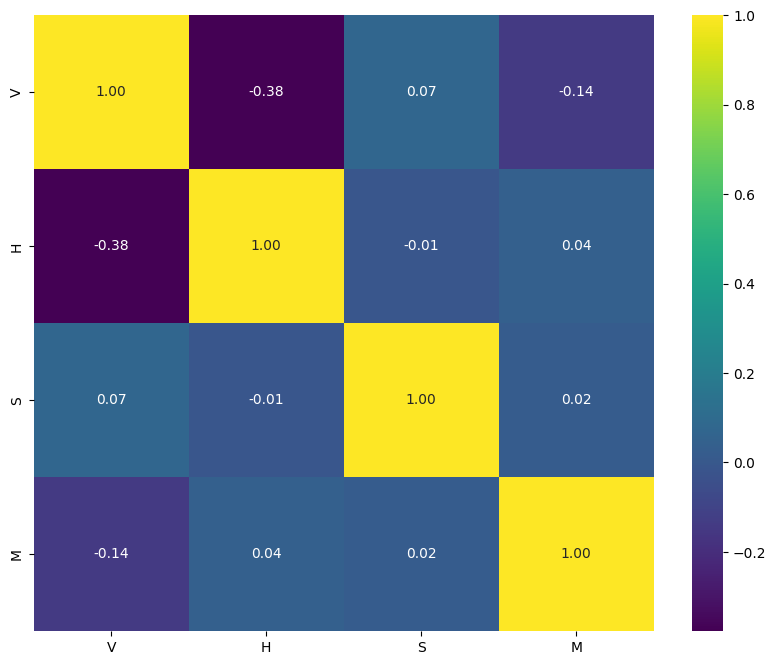

In [16]:
corr2 =df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr2,  cmap='viridis', annot=True, fmt=".2f")
plt.show()

In [17]:
# Soil is irrelevant
X = df.drop(['M'], axis = 1)
y = df['M']

print((X), (y))
print()
print(type(X), type(y))
print()
print(X.shape, y.shape)

            V         H    S
0    0.338157  0.000000  0.0
1    0.320241  0.181818  0.0
2    0.287009  0.272727  0.0
3    0.256284  0.454545  0.0
4    0.262840  0.545455  0.0
..        ...       ...  ...
333  0.323262  0.909091  0.4
334  0.444108  0.181818  1.0
335  0.353474  0.454545  1.0
336  0.362537  0.727273  1.0
337  0.314199  1.000000  1.0

[338 rows x 3 columns] 0      1
1      1
2      1
3      1
4      1
      ..
333    5
334    5
335    5
336    5
337    5
Name: M, Length: 338, dtype: int64

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>

(338, 3) (338,)


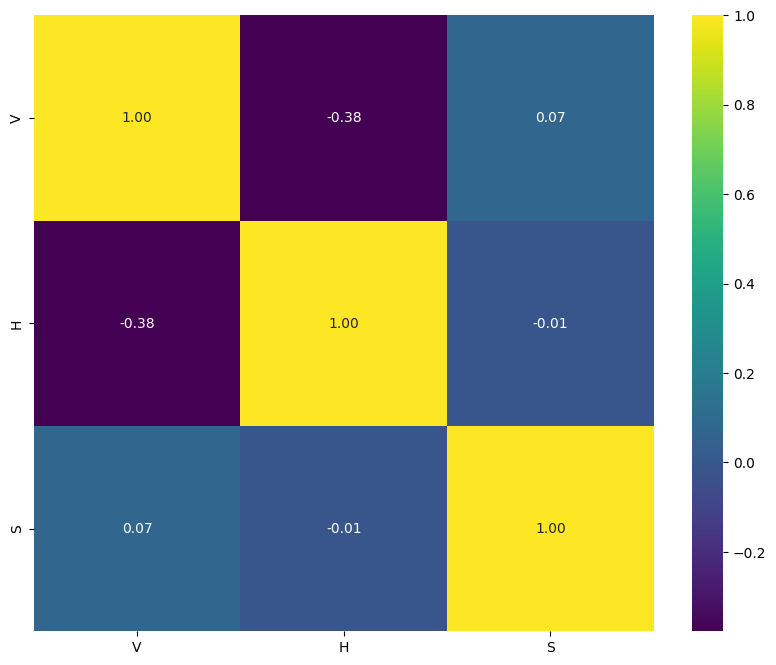

In [18]:
corr3 =X.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr3,  cmap='viridis', annot=True, fmt=".2f")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
#import os
#os.makedirs('/content/drive/MyDrive/DA-23/Pr_1/Mines_Split', exist_ok=True)
#X_train.to_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Split/Mines_X_train.csv')
#X_test.to_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Split/Mines_X_test.csv')
#y_train.to_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Split/Mines_y_train.csv')
#y_test.to_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Split/Mines_y_test.csv')

In [21]:
print(type(X), type(y))
print(X_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(270, 3) (270,)


In [22]:
set(y_test) - set(y_train)

set()

In [23]:
set(X_test) - set(X_train)

set()

### kNN

#### Train

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
pred = knn.predict(X_test)

#### Res

<Axes: >

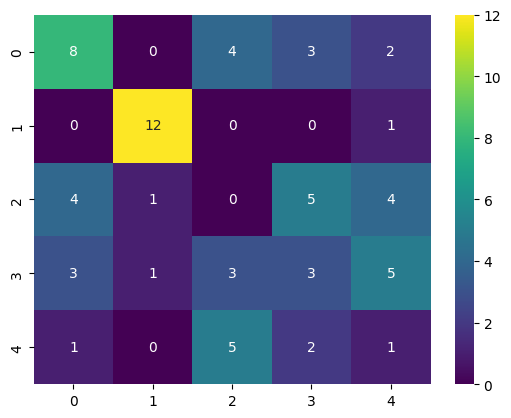

In [27]:

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.50      0.47      0.48        17
           2       0.86      0.92      0.89        13
           3       0.00      0.00      0.00        14
           4       0.23      0.20      0.21        15
           5       0.08      0.11      0.09         9

    accuracy                           0.35        68
   macro avg       0.33      0.34      0.34        68
weighted avg       0.35      0.35      0.35        68



In [29]:
print(accuracy_score(y_test,pred))

0.35294117647058826


#### Fix

In [30]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

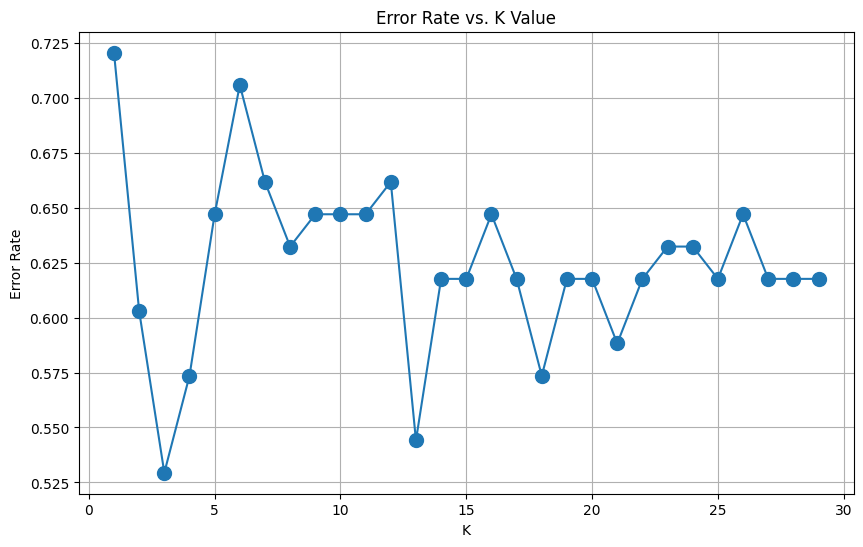

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

3
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           1       0.45      0.82      0.58        17
           2       0.67      0.92      0.77        13
           3       0.50      0.21      0.30        14
           4       0.29      0.13      0.18        15
           5       0.17      0.11      0.13         9

    accuracy                           0.47        68
   macro avg       0.41      0.44      0.39        68
weighted avg       0.43      0.47      0.41        68



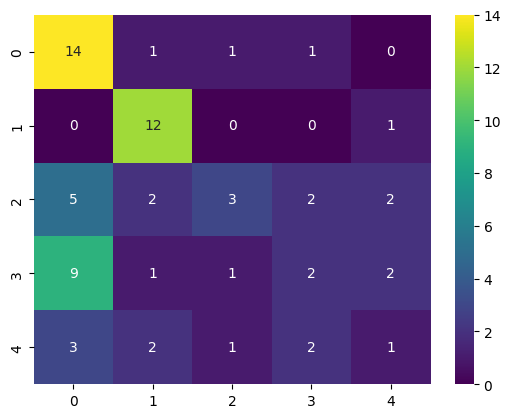

In [32]:
minpos = error_rate.index(min(error_rate)) + 1
print(minpos)
model_knn = KNeighborsClassifier(n_neighbors=minpos)

model_knn.fit(X_train,y_train)
pred = model_knn.predict(X_test)

cm = confusion_matrix(y_test,pred)
print(sns.heatmap(cm, annot=True, fmt='g',cmap='viridis'))
rep = classification_report(y_test,pred)
print(rep)

sample_dict['kNN'] = accuracy_score(y_test,pred)
sample_dict['kNN_optimal'] = minpos

### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_dtc = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [34]:

y_pred = model_dtc.predict(X_test)

##### Model Eval

In [35]:

from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(classification_report(y_test, y_pred))
sample_dict['DTC'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.59      0.59      0.59        17
           2       0.93      1.00      0.96        13
           3       0.33      0.36      0.34        14
           4       0.50      0.33      0.40        15
           5       0.00      0.00      0.00         9

    accuracy                           0.49        68
   macro avg       0.47      0.46      0.46        68
weighted avg       0.50      0.49      0.49        68



<Axes: >

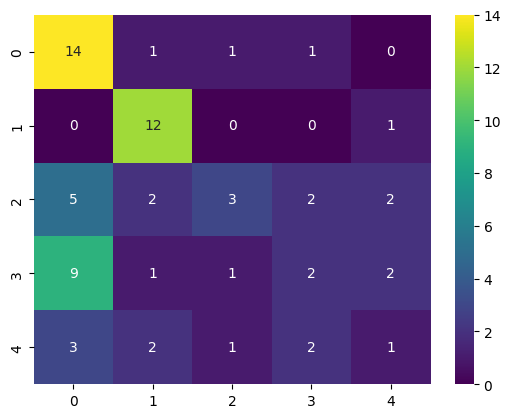

In [37]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

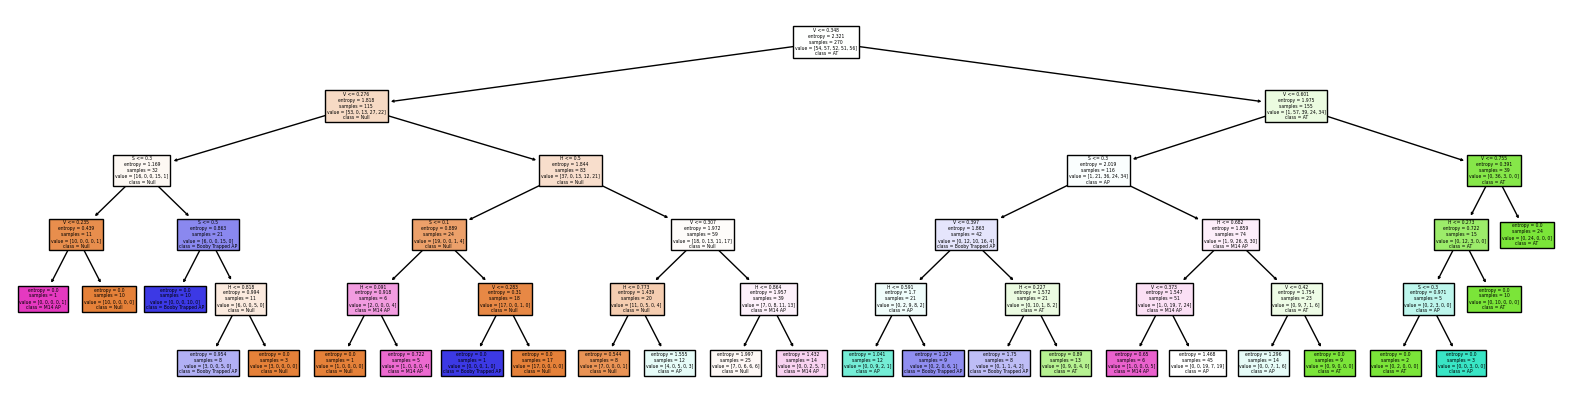

In [38]:
plt.figure(figsize = (20,5))
plot_tree(
    model_dtc,
    feature_names = X_train.columns.values,
    class_names = ['Null','AT','AP','Booby Trapped AP','M14 AP'],
    filled = True
    )
plt.show()

### SVM

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [40]:
model_svc = SVC(C=1000.0, gamma = 1.0, kernel = 'rbf')
model_svc.fit(X_train,y_train)

SVC(C=1000.0, gamma=1.0)

#### Evaluation

In [41]:
y_pred = model_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16  0  0  1  0]
 [ 0 12  1  0  0]
 [ 2  0  4  0  8]
 [ 4  0  3  3  5]
 [ 1  0  4  1  3]]
              precision    recall  f1-score   support

           1       0.70      0.94      0.80        17
           2       1.00      0.92      0.96        13
           3       0.33      0.29      0.31        14
           4       0.60      0.20      0.30        15
           5       0.19      0.33      0.24         9

    accuracy                           0.56        68
   macro avg       0.56      0.54      0.52        68
weighted avg       0.59      0.56      0.54        68



#### Gridsearch

In [42]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [43]:
grid = GridSearchCV(SVC(), param_grid, refit=True)

In [44]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [45]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [46]:
model_svc_best = SVC(C=1000.0, gamma = 1.0, kernel = 'rbf')

In [47]:
grid.best_estimator_

SVC(C=1000, gamma=1)

In [48]:
grid_predictions = grid.predict(X_test)

<Axes: >

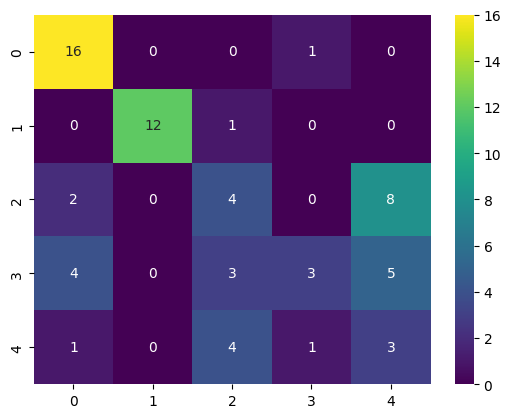

In [49]:
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

In [50]:
print(classification_report(y_test,grid_predictions))
sample_dict['SVC'] = accuracy_score(y_test,grid_predictions)

              precision    recall  f1-score   support

           1       0.70      0.94      0.80        17
           2       1.00      0.92      0.96        13
           3       0.33      0.29      0.31        14
           4       0.60      0.20      0.30        15
           5       0.19      0.33      0.24         9

    accuracy                           0.56        68
   macro avg       0.56      0.54      0.52        68
weighted avg       0.59      0.56      0.54        68



### Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = model_rf.predict(X_test)

<Axes: >

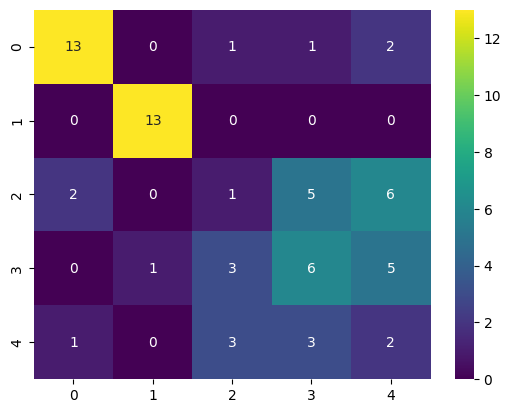

In [54]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

In [55]:
print(classification_report(y_test,y_pred))
sample_dict['RFC'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.93      1.00      0.96        13
           3       0.12      0.07      0.09        14
           4       0.40      0.40      0.40        15
           5       0.13      0.22      0.17         9

    accuracy                           0.51        68
   macro avg       0.48      0.49      0.48        68
weighted avg       0.51      0.51      0.51        68



In [56]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import pydotplus

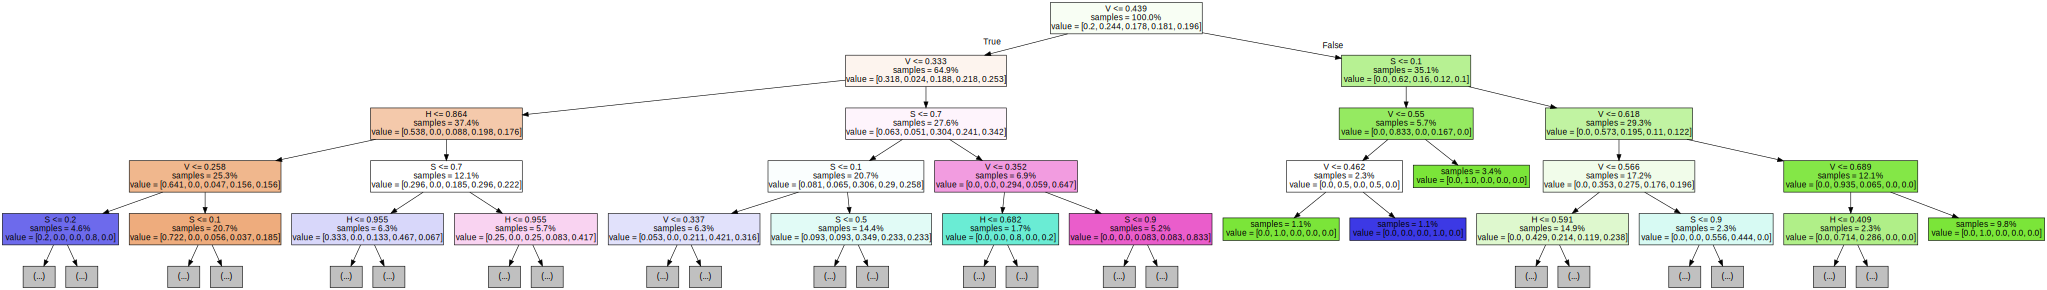

In [57]:
tree = model_rf.estimators_[1]
dot_data = export_graphviz(tree,
                           feature_names=X_train.columns,
                           filled=True,
                           max_depth=4,
                           impurity=False,
                           proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

### AdaBoost

#### Default

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_abc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model_abc.predict(X_test)


In [60]:
print(classification_report(y_test,y_pred))
sample_dict['AB_D'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.80      0.47      0.59        17
           2       1.00      0.85      0.92        13
           3       0.25      0.07      0.11        14
           4       0.30      0.67      0.42        15
           5       0.10      0.11      0.11         9

    accuracy                           0.46        68
   macro avg       0.49      0.43      0.43        68
weighted avg       0.52      0.46      0.45        68



#### Custom Estimators

##### Decision Tree

In [61]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, estimator=model_dtc,learning_rate=1,algorithm='SAMME' )

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

<Axes: >

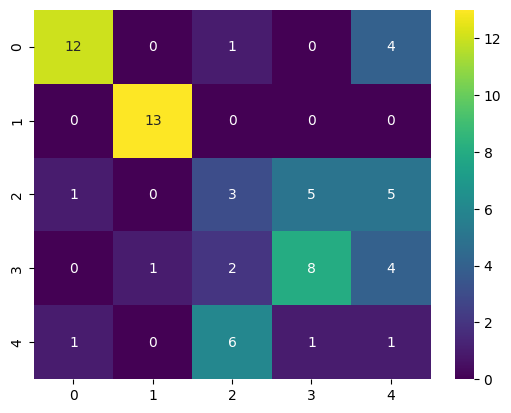

In [62]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

In [63]:
print(classification_report(y_test,y_pred))
sample_dict['AB_DTC'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.86      0.71      0.77        17
           2       0.93      1.00      0.96        13
           3       0.25      0.21      0.23        14
           4       0.57      0.53      0.55        15
           5       0.07      0.11      0.09         9

    accuracy                           0.54        68
   macro avg       0.54      0.51      0.52        68
weighted avg       0.58      0.54      0.56        68



##### Best SVC

In [64]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, estimator=model_svc_best,learning_rate=1,algorithm='SAMME' )

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

<Axes: >

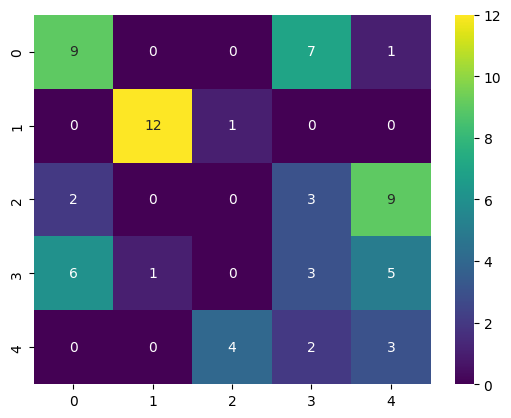

In [65]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

In [66]:
print(classification_report(y_test,y_pred))
sample_dict['AB_SVC'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.53      0.53      0.53        17
           2       0.92      0.92      0.92        13
           3       0.00      0.00      0.00        14
           4       0.20      0.20      0.20        15
           5       0.17      0.33      0.22         9

    accuracy                           0.40        68
   macro avg       0.36      0.40      0.37        68
weighted avg       0.38      0.40      0.38        68



##### Random Forest

In [67]:
# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, estimator=model_rf,learning_rate=1,algorithm='SAMME' )

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [68]:
y_pred

array([5, 4, 4, 1, 2, 5, 2, 5, 5, 4, 1, 2, 4, 2, 2, 3, 5, 4, 2, 5, 1, 4,
       4, 3, 5, 2, 1, 4, 1, 3, 2, 3, 1, 3, 1, 5, 5, 2, 4, 1, 4, 3, 5, 1,
       1, 4, 2, 4, 4, 5, 1, 5, 5, 3, 1, 2, 1, 4, 1, 1, 1, 2, 5, 2, 2, 5,
       5, 4])

In [69]:
y_test

97     3
306    4
105    3
13     1
250    2
      ..
92     2
249    2
278    3
123    3
113    3
Name: M, Length: 68, dtype: int64

<Axes: >

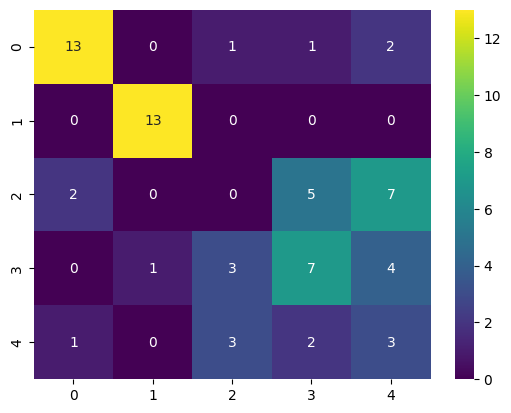

In [70]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g',cmap='viridis')

In [71]:
print(classification_report(y_test,y_pred))
sample_dict['AB_RFC'] = accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           1       0.81      0.76      0.79        17
           2       0.93      1.00      0.96        13
           3       0.00      0.00      0.00        14
           4       0.47      0.47      0.47        15
           5       0.19      0.33      0.24         9

    accuracy                           0.53        68
   macro avg       0.48      0.51      0.49        68
weighted avg       0.51      0.53      0.52        68



In [72]:
a_dict = {key: sample_dict[key] for key in sample_dict if key not in ['Best','kNN_optimal']}
sample_dict['Best'] = str(max(a_dict, key=a_dict.get))
sample_dict

{'kNN': 0.47058823529411764,
 'kNN_optimal': 3,
 'DTC': 0.4852941176470588,
 'SVC': 0.5588235294117647,
 'RFC': 0.5147058823529411,
 'AB_D': 0.45588235294117646,
 'AB_DTC': 0.5441176470588235,
 'AB_SVC': 0.39705882352941174,
 'AB_RFC': 0.5294117647058824,
 'Best': 'SVC'}

In [73]:
df_res = df_res.append(sample_dict,ignore_index=True)

<ipython-input-73-00ed2d45c4a9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_res = df_res.append(sample_dict,ignore_index=True)


## Gathering Data

In [74]:
df_res

,kNN,kNN_optimal,DTC,SVC,RFC,AB_D,AB_DTC,AB_SVC,AB_RFC,Best
0,0.470588,3.0,0.485294,0.558824,0.514706,0.455882,0.544118,0.397059,0.529412,SVC


In [75]:
#df_res.to_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Res_Compare_wo_Soil.csv')

## Meta Analysis

In [76]:
df_res_soil = pd.read_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Res_Compare_w_Soil.csv')

In [77]:
df_res_wo_soil = pd.read_csv('/content/drive/MyDrive/DA-23/Pr_1/Mines_Res_Compare_wo_Soil.csv')

In [78]:
df_res_soil_short = df_res_soil.drop(['Unnamed: 0', "kNN_optimal"], axis = 1)
df_res_wo_soil_short = df_res_wo_soil.drop(['Unnamed: 0', "kNN_optimal"], axis = 1)

In [79]:
df_res_soil_short_mean = df_res_soil_short.describe().loc[['mean']].copy()
df_res_wo_soil_short_mean = df_res_wo_soil_short.describe().loc[['mean']].copy()
df_mean  = pd.concat([df_res_soil_short_mean,df_res_wo_soil_short_mean], axis = 0)
df_mean

,kNN,DTC,SVC,RFC,AB_D,AB_DTC,AB_SVC,AB_RFC
mean,0.457843,0.540196,0.582353,0.512745,0.382353,0.576471,0.471569,0.505882
mean,0.513725,0.485294,0.507843,0.468627,0.343137,0.465686,0.435294,0.485294


In [80]:
df_res_soil_short_max = df_res_soil_short.describe().loc[['max']].copy()
df_res_wo_soil_short_max = df_res_wo_soil_short.describe().loc[['max']].copy()
df_max  = pd.concat([df_res_soil_short_max,df_res_wo_soil_short_max], axis = 0)
df_max

,kNN,DTC,SVC,RFC,AB_D,AB_DTC,AB_SVC,AB_RFC
max,0.573529,0.617647,0.691176,0.661765,0.455882,0.691176,0.588235,0.661765
max,0.661765,0.558824,0.676471,0.632353,0.485294,0.544118,0.544118,0.617647


In [81]:
def absolute_value(val):
    a  = np.round(val/100.*15, 0)
    return int(a)

In [82]:
labels_soil = set(df_res_soil['Best'].tolist())
share_soil = [df_res_soil['Best'].tolist().count(x) for x in labels_soil]

labels_wo_soil = set(df_res_wo_soil['Best'].tolist())
share_wo_soil = [df_res_wo_soil['Best'].tolist().count(x) for x in labels_wo_soil]


In [83]:
all_labels = set(df_res_soil_short.columns)
all_labels

{'AB_D', 'AB_DTC', 'AB_RFC', 'AB_SVC', 'Best', 'DTC', 'RFC', 'SVC', 'kNN'}

In [84]:
colours = {'AB_D': "C0",
           'AB_DTC': "C1",
           'AB_RFC': "C2",
           'AB_SVC': "C3",
           'DTC': "C4",
           'RFC': "C5",
           'SVC': "C6",
           'kNN': "C7"}
colours['DTC']

'C4'

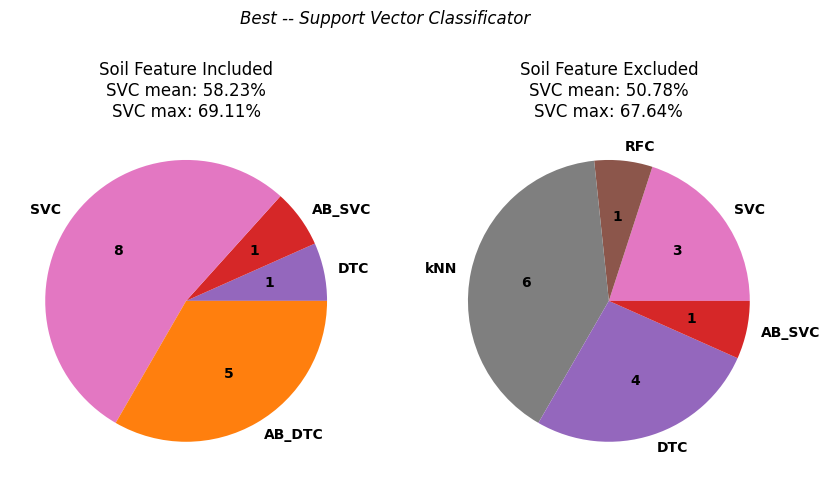

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
fig.suptitle('Best -- Support Vector Classificator',fontstyle='italic')
ax1.set_title('Soil Feature Included\nSVC mean: 58.23%\nSVC max: 69.11%')
ax2.set_title('Soil Feature Excluded\nSVC mean: 50.78%\nSVC max: 67.64%')
ax1.pie(
        share_soil,
        labels=labels_soil,
        autopct=absolute_value,
        textprops=dict(weight="bold"),
        colors=[colours[key] for key in labels_soil]
        )
ax2.pie(
        share_wo_soil,
        labels=labels_wo_soil,
        autopct=absolute_value,
        textprops=dict(weight="bold"),
        colors=[colours[key] for key in labels_wo_soil]
        )
plt.show()


In [86]:
df_res_soil['kNN_optimal'].describe().loc[['count','min','max']]

count    15.0
min       2.0
max      28.0
Name: kNN_optimal, dtype: float64

In [87]:
df_res_wo_soil['kNN_optimal'].describe().loc[['count','min','max']]

count    15.0
min       1.0
max      29.0
Name: kNN_optimal, dtype: float64